<a href="https://colab.research.google.com/github/SuhelAnsari9272/Airbnb-booking-analysis/blob/main/Airbnb_capstone_ABADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# reading the files
calender_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/calendar.csv')
host_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/hosts.csv')
listing_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/listings.csv')
reviews_data = pd.read_csv('/content/drive/MyDrive/AirBnb_ABADS/reviews.csv')

In [ ]:
# Copying the data
cal_df = calender_data.copy()
host_df = host_data.copy()
list_df = listing_data.copy()
rev_df = reviews_data.copy()

#### Calender data

In [ ]:
#data overview
cal_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [ ]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [ ]:
missing_values =  np.round(cal_df.isnull().sum() / (cal_df.shape[0]) * 100, 2)
print(missing_values)

calender_id       0.00
listing_id        0.00
date              0.00
available         0.00
price             0.02
adjusted_price    0.02
minimum_nights    0.00
maximum_nights    0.00
dtype: float64


In [ ]:
#removing null values from the dataframe
cal_df.dropna(inplace = True)

In [ ]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319117 non-null  int64  
 1   listing_id      319117 non-null  int64  
 2   date            319117 non-null  object 
 3   available       319117 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319117 non-null  int64  
 7   maximum_nights  319117 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 21.9+ MB


In [ ]:
cal_df.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319117.000000,3.191170e+05,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000
mean,159595.247633,3.488444e+07,0.535318,109.917779,109.712131,5.378855,812.348245
std,92142.796298,1.523418e+07,0.498752,185.791168,185.551851,21.458047,511.557606
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.000000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159595.000000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239390.000000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


* Most of the listings are available to be booked.
* There is presence of outliers in the price column. The distribution of price is right skewed.
* The values of minimum nights and maximum nights have very large numbers which need to be verified.

<Axes: xlabel='price', ylabel='Density'>

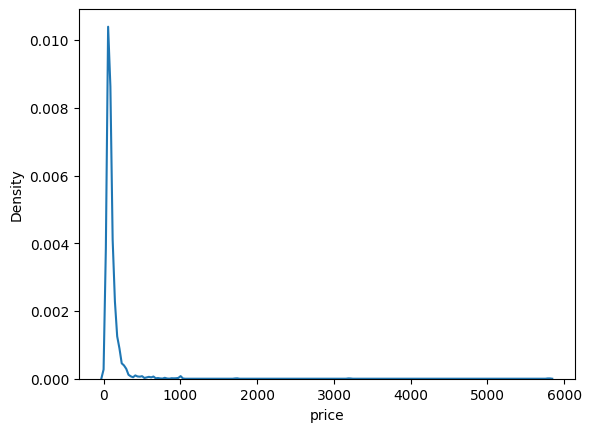

In [ ]:
from matplotlib import pyplot as plt
sns.kdeplot(cal_df['price'])

<Axes: ylabel='price'>

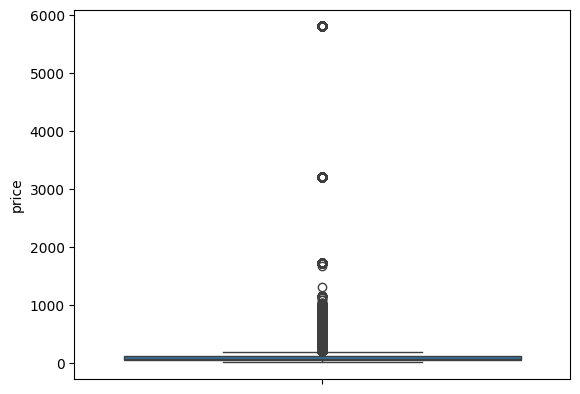

In [ ]:
#Boxplot of price columns
sns.boxplot(cal_df['price'])

In [ ]:
#Frequency distribution of availablity
cal_df['available'].value_counts()

1    170829
0    148288
Name: available, dtype: int64

In [ ]:
cal_df['available'].value_counts() / cal_df.shape[0] *100

1    53.531777
0    46.468223
Name: available, dtype: float64

In [ ]:
cal_df['minimum_nights'].value_counts()

1      126227
2      108770
3       22670
7        9906
5        9366
30       8777
4        8295
14       6202
6        2977
10       2311
29       1803
20       1629
15       1282
28       1105
60        933
13        746
12        727
21        723
90        579
100       533
16        369
365       367
8         360
120       359
9         283
40        190
26        190
150       185
180       185
500       184
61        181
50        179
300       175
19        174
25        174
110         1
Name: minimum_nights, dtype: int64

In [ ]:
# Different values of Minimium nights and Maximum nights
cal_df['minimum_nights'].value_counts()

1      126227
2      108770
3       22670
7        9906
5        9366
30       8777
4        8295
14       6202
6        2977
10       2311
29       1803
20       1629
15       1282
28       1105
60        933
13        746
12        727
21        723
90        579
100       533
16        369
365       367
8         360
120       359
9         283
40        190
26        190
150       185
180       185
500       184
61        181
50        179
300       175
19        174
25        174
110         1
Name: minimum_nights, dtype: int64

In [ ]:
cal_df['maximum_nights'].value_counts()[0:10]

1125    207574
365      25596
13        9999
10        7050
30        6688
999       5403
21        5302
7         5214
14        4921
1000      4028
Name: maximum_nights, dtype: int64

##### Host data

In [ ]:
host_data.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [ ]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [ ]:
#Removing the null values present in the host_location
host_df.dropna(subset = ['host_location'],inplace = True)

In [ ]:
host_df.describe(include = 'O')

,host_name,host_since,host_location,host_about
count,1108,1108,1108,490
unique,749,925,149,488
top,Jan,2015-06-03 00:00:00.000000,"Antwerp, Flanders, Belgium","Hello traveller,\n\nWelcome to my profile! My ..."
freq,10,4,676,2


* There are 749 unique hosts.
* Hosts are serving from 149 unique locations.


In [ ]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1108 non-null   int64 
 1   host_name      1108 non-null   object
 2   host_since     1108 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 51.9+ KB


In [ ]:
host_df.groupby('host_location').size().sort_values()

host_location
 Zeeland, Netherlands                     1
Kiryas Joel, New York, United States      1
Kinrooi, Flanders, Belgium                1
Sitges, Catalonia, Spain                  1
Skopje, North Macedonia                   1
                                       ... 
Antwerpen, Vlaams Gewest, Belgium        20
Antwerpen, Vlaanderen, Belgium           25
Belgium                                  27
BE                                      114
Antwerp, Flanders, Belgium              676
Length: 149, dtype: int64

#### Listing data

In [ ]:
listing_data.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [ ]:
#Data information
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [ ]:
#Data overview
list_df.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id
count,1.749000e+03,1749.000000,1749.000000,1749.000000,1621.000000,1708.000000,1.749000e+03
mean,3.485506e+07,51.214069,4.413165,3.761578,1.529303,2.220726,1.417765e+08
std,1.523689e+07,0.013740,0.019373,2.771378,1.091453,2.227509,1.286506e+08
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05
25%,2.337286e+07,51.207870,4.400240,2.000000,1.000000,1.000000,2.875771e+07
50%,3.889829e+07,51.216540,4.409460,3.000000,1.000000,2.000000,1.033633e+08
75%,4.838954e+07,51.220880,4.424660,4.000000,2.000000,3.000000,2.344842e+08
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08


In [ ]:
list_df.describe(include = 'O')

,listing_url,name,description,property_type,room_type,bathrooms_text,amenities
count,1749,1749,1679,1749,1749,1749,1749
unique,1749,1710,1556,39,4,26,1656
top,https://www.airbnb.com/rooms/50904,Luxury Suites Castel,"Bright and beautiful newly built apartment, ve...",Entire rental unit,Entire home/apt,1 bath,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh..."
freq,1,5,10,981,1379,825,9


* The number of accomodates vary from the 1 to 16.
* The number of beds are having values of 44 which is an anamoly.
* There are 39 different property_types present in the data.
* We can extract the number of bathrooms and kind of bathroom from bathrooms_text.
* We can use amentities column to extract different amentities available in a particular list.
* We need to impute the values the bedrooms and beds column.


In [ ]:
# Frequency distribution of bedrooms
list_df['bedrooms'].value_counts()

1.0     1047
2.0      428
3.0       91
4.0       31
5.0       11
7.0        5
10.0       2
11.0       1
8.0        1
6.0        1
9.0        1
15.0       1
20.0       1
Name: bedrooms, dtype: int64

<Axes: xlabel='beds'>

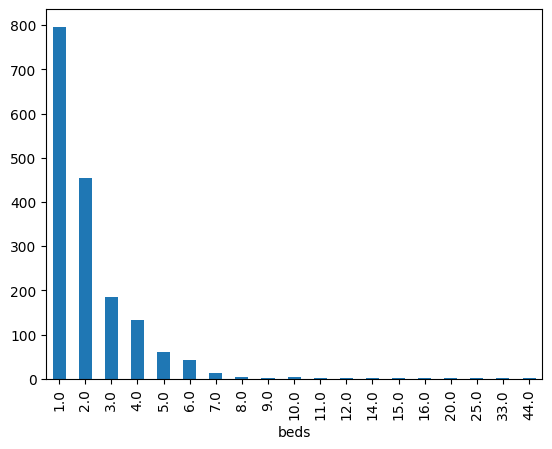

In [ ]:
# Frequency distribution of bedrooms
list_df.groupby('beds').size().plot(kind ='bar')

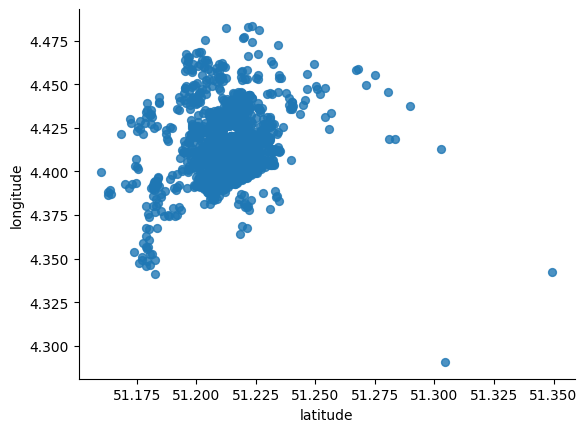

In [ ]:
# @title latitude vs longitude

from matplotlib import pyplot as plt
listing_data.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='accomodates'>

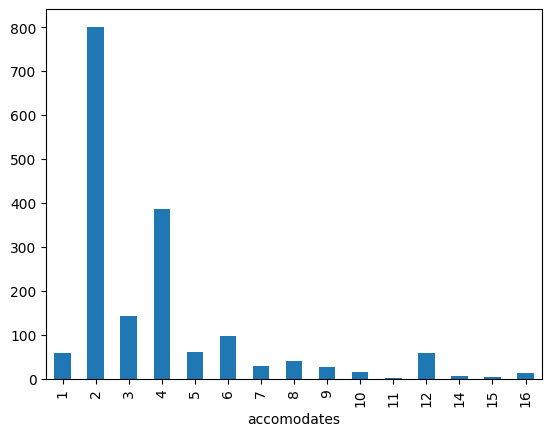

In [ ]:
#Frequency distribution of accomodates
list_df.groupby('accomodates').size().plot(kind ='bar')

<ipython-input-25-34d00ae91796>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(listing_data, x='accomodates', y='room_type', inner='box', palette='Dark2')


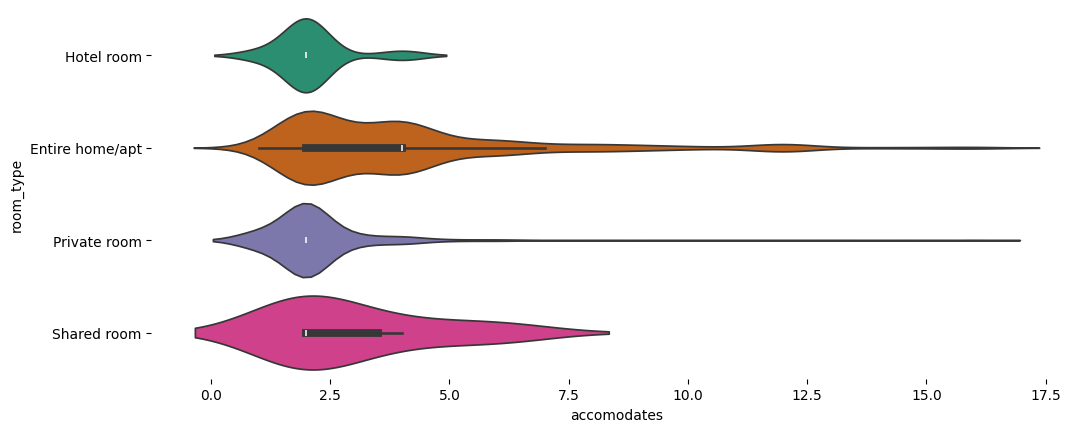

In [ ]:
# @title room_type vs accomodates

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(listing_data['room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(listing_data, x='accomodates', y='room_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
mode_value = list_df['beds'].mode()[0]

# Impute null values with the mode
list_df['beds'].fillna(mode_value, inplace=True)

# Check if there are any null values left
print(list_df['beds'].isnull().sum())

0


In [ ]:
mode_value = list_df['bedrooms'].mode()[0]

# Impute null values with the mode
list_df['bedrooms'].fillna(mode_value, inplace=True)

# Check if there are any null values left
print(list_df['bedrooms'].isnull().sum())

0


In [ ]:
reviews_data.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [ ]:
# data information
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [ ]:
host_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [ ]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


There are some null values present in all the datasets.


In [ ]:
#Data summary
calender_data.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319192.000000,3.191920e+05,319192.000000,319117.000000,319117.000000,319192.000000,319192.000000
mean,159596.500000,3.488528e+07,0.535192,109.917779,109.712131,5.379395,812.206102
std,92142.937899,1.523257e+07,0.498761,185.791168,185.551851,21.456127,511.622075
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.750000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159596.500000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239394.250000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


In [ ]:
listing_data.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id
count,1.749000e+03,1749.000000,1749.000000,1749.000000,1621.000000,1708.000000,1.749000e+03
mean,3.485506e+07,51.214069,4.413165,3.761578,1.529303,2.220726,1.417765e+08
std,1.523689e+07,0.013740,0.019373,2.771378,1.091453,2.227509,1.286506e+08
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05
25%,2.337286e+07,51.207870,4.400240,2.000000,1.000000,1.000000,2.875771e+07
50%,3.889829e+07,51.216540,4.409460,3.000000,1.000000,2.000000,1.033633e+08
75%,4.838954e+07,51.220880,4.424660,4.000000,2.000000,3.000000,2.344842e+08
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08


In [ ]:
reviews_data.describe()

,review_id,listing_id,reviewer_id
count,62987.00000,6.298700e+04,6.298700e+04
mean,31494.00000,2.277250e+07,1.148883e+08
std,18182.92504,1.417794e+07,1.132804e+08
min,1.00000,5.090400e+04,5.150000e+02
25%,15747.50000,9.913124e+06,2.433136e+07
50%,31494.00000,2.165832e+07,7.226982e+07
75%,47240.50000,3.405420e+07,1.782096e+08
max,62987.00000,5.382519e+07,4.367984e+08


In [ ]:
host_data.describe()

,host_id
count,1.111000e+03
mean,1.268568e+08
std,1.282286e+08
min,2.340770e+05
25%,2.361567e+07
50%,6.618861e+07
75%,2.143271e+08
max,4.373093e+08
